In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import random
import pygraphviz

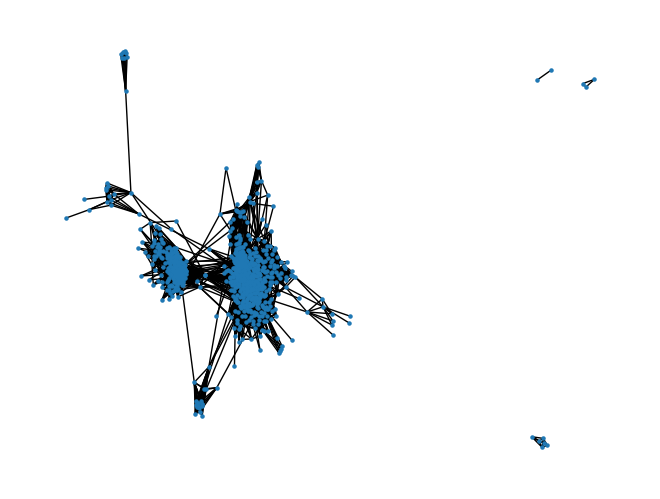

In [12]:
# Using 1684.edges, load and visualize data
el = open("./facebook/1684.edges", "rb")
G = nx.read_edgelist(el, nodetype=int)
nx.draw(G, node_size=5, with_labels=False)

In [13]:
# Calculate the degrees of each node
G.degree()

DegreeView({2849: 80, 3021: 49, 2694: 92, 3096: 75, 2818: 15, 2725: 7, 2951: 101, 3285: 26, 3082: 115, 2832: 29, 2960: 91, 2800: 81, 2929: 47, 3029: 51, 2909: 76, 2880: 65, 2754: 121, 2872: 75, 3232: 104, 3184: 60, 2948: 20, 3277: 70, 3297: 62, 2925: 78, 3397: 114, 2939: 68, 3185: 79, 3115: 60, 2927: 91, 3426: 112, 3333: 6, 3394: 30, 3087: 50, 3236: 20, 3327: 49, 2675: 37, 2863: 103, 3296: 40, 3293: 59, 3384: 48, 3005: 42, 3039: 21, 3428: 7, 3139: 20, 3198: 85, 3417: 88, 2944: 105, 2738: 82, 3399: 36, 2777: 82, 2894: 60, 3320: 112, 2793: 98, 2787: 48, 3377: 30, 2778: 94, 3101: 121, 3214: 62, 3090: 107, 2729: 62, 3085: 51, 2966: 106, 3033: 87, 2919: 69, 2893: 7, 2771: 13, 2749: 52, 2986: 99, 2829: 27, 2711: 30, 2755: 88, 3149: 65, 2887: 39, 3247: 65, 3347: 75, 3065: 52, 3286: 22, 3419: 62, 3319: 25, 3046: 36, 2773: 56, 2666: 60, 2706: 66, 2940: 63, 2852: 10, 3226: 78, 3316: 38, 3050: 15, 2667: 19, 3117: 62, 3173: 17, 2913: 74, 2676: 82, 2878: 10, 3249: 13, 2897: 53, 3119: 68, 3204: 46, 

In [28]:
# Generate a sorted list of pairs (node, degree) for each node in the graph
degrees_dict = dict(G.degree())
degree_list = sorted(degrees_dict.items(), key=lambda x: x[1], reverse=True)
top_50 = degree_list[:50]
top_50

[(2839, 136),
 (3363, 130),
 (2754, 121),
 (3101, 121),
 (3291, 118),
 (3082, 115),
 (2742, 115),
 (3397, 114),
 (3426, 112),
 (3320, 112),
 (3090, 107),
 (2966, 106),
 (3280, 106),
 (3434, 106),
 (2944, 105),
 (3232, 104),
 (2863, 103),
 (2877, 103),
 (3116, 102),
 (2951, 101),
 (2786, 101),
 (3051, 100),
 (2986, 99),
 (2719, 99),
 (2793, 98),
 (2661, 98),
 (3078, 98),
 (2782, 97),
 (3387, 96),
 (2669, 96),
 (3026, 95),
 (2956, 95),
 (2778, 94),
 (2716, 94),
 (2694, 92),
 (2679, 92),
 (3330, 92),
 (2960, 91),
 (2927, 91),
 (2906, 91),
 (3201, 91),
 (3000, 90),
 (3154, 90),
 (2915, 90),
 (3035, 89),
 (3417, 88),
 (2755, 88),
 (2730, 88),
 (3150, 88),
 (3033, 87),
 (2890, 87),
 (3038, 87),
 (2916, 86),
 (3324, 86),
 (3198, 85),
 (2928, 85),
 (3252, 85),
 (3076, 85),
 (2750, 84),
 (3152, 84),
 (3351, 83),
 (3132, 83),
 (3348, 83),
 (2738, 82),
 (2777, 82),
 (2676, 82),
 (2910, 82),
 (3054, 82),
 (3104, 82),
 (2757, 82),
 (2664, 82),
 (2800, 81),
 (3350, 81),
 (2833, 81),
 (2943, 81),
 (2

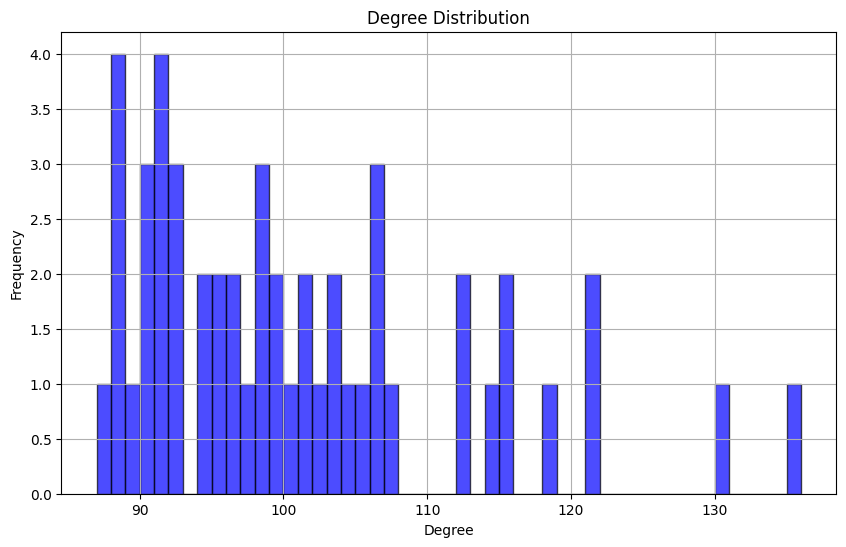

In [15]:
# Plot the degree distribution
degrees = [deg for node, deg in top_50]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color='blue', alpha=0.7, edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [16]:
# Pick 5 random pairs of nodes from the top 50
nodes = [node for node, deg in degree_list]
random_pairs = random.sample([(nodes[i], nodes[j]) for i in range(50) for j in range(i+1, 50)], 5)
random_pairs

[(2915, 3417), (2754, 3101), (2951, 3387), (3291, 2669), (3201, 3033)]

In [17]:
# Calcluate the shortest path for each pair
shortest_paths = {}
for pair in random_pairs:
    shortest_paths[pair] = nx.shortest_path(G, source=pair[0], target=pair[1])
shortest_paths

{(2915, 3417): [2915, 3417],
 (2754, 3101): [2754, 2863, 3101],
 (2951, 3387): [2951, 3097, 2946, 3387],
 (3291, 2669): [3291, 3274, 2669],
 (3201, 3033): [3201, 3020, 3117, 3033]}

In [18]:
# Graphviz stuff

In [19]:
# Find nodes in each path with degree values above the threshold (100)
threshold = 100
high_deg_nodes = []
for pair, path in shortest_paths.items():
    for node in path:
        if degrees_dict[node] > threshold:
            high_deg_nodes.append(node)
high_deg_nodes

[2754, 2863, 3101, 2951, 3291]

In [27]:
#graphviz stuff
A = nx.nx_agraph.to_agraph(G)
A.draw("k5.png", prog="neato")